In [1]:
from rc_extension import Reward_Competition
from pathlib import Path

In [2]:
# method = input("Calculation method (modified, baseline, standard): ")
# directory_path = Path(input("Path for plots: "))

cohort = "combined"
# cohort = "cohort_1_2"
# cohort = "cohort_3"
# condition = 'Winning'
condition = 'Losing'
csv_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\P2C1_Reward_Comp_Manual_Scoring.xlsx"
csv_path1 = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_3\P2C3_Reward_Comp_Manual_Scoring.xlsx"
# experiment_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_3\testing"
experiment_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\Rig Data"
experiment_path1 = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_3\Rig Data"

# directory_path = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Training\\plots\\{method}\\{day}\\{region}')
directory_path = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\{cohort}\\{condition}')
directory_path1 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\{cohort}\\{condition}\\first')
directory_path2 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\{cohort}\\{condition}\\last')
directory_path3 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\{cohort}\\win_lose')

# Create the directory (with parents=True to create nested directories)
directory_path.mkdir(parents=True, exist_ok=True)
directory_path1.mkdir(parents=True, exist_ok=True)
directory_path2.mkdir(parents=True, exist_ok=True)
directory_path3.mkdir(parents=True, exist_ok=True)

In [3]:
exp = Reward_Competition(experiment_path, behavior_folder_path=None)
exp1 = Reward_Competition(experiment_path1, behavior_folder_path=None)

Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\Rig Data\n1-240611-091131\Notes.txt
read from t=0s to t=2042.14s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\Rig Data\n1-240612-113256\Notes.txt
read from t=0s to t=2055.01s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\Rig Data\n1-240614-073020\Notes.txt
read from t=0s to t=2054.68s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\Rig Data\n2-240611-074031\Notes.txt
read from t=0s to t=2045.31s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\Rig Data\n2-240612-072325\Notes.txt
read from t=0s to t=2041.48s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\Rig Data\n2-240613-113505\Notes.txt
read from t=0s to t=2047.15s
Found Synapse no

In [4]:
exp.rc_processing()
if cohort == "combined":
    exp1.rc_processing()

dict_items([('n1-240611-091131', <trial_class.Trial object at 0x000001E80063F170>), ('n1-240612-113256', <trial_class.Trial object at 0x000001E8007EF770>), ('n1-240614-073020', <trial_class.Trial object at 0x000001E80075CFB0>), ('n2-240611-074031', <trial_class.Trial object at 0x000001E8006B36B0>), ('n2-240612-072325', <trial_class.Trial object at 0x000001E83F3D8D10>), ('n2-240613-113505', <trial_class.Trial object at 0x000001E83F3D86B0>), ('n3-240611-115257', <trial_class.Trial object at 0x000001E8005E0D10>), ('n3-240613-085222', <trial_class.Trial object at 0x000001E8006D81A0>), ('n3-240614-090514', <trial_class.Trial object at 0x000001E800789BE0>), ('n4-240612-085323', <trial_class.Trial object at 0x000001E8006B1EB0>), ('n4-240613-072239', <trial_class.Trial object at 0x000001E8005BF320>), ('n4-240614-130653', <trial_class.Trial object at 0x000001E800BCAC90>), ('n5-240912-080246', <trial_class.Trial object at 0x000001E83F3DA420>), ('n5-240913-094304', <trial_class.Trial object at 0x

In [5]:
if cohort == "combined":
    exp1.read_manual_scoring2(csv_path1)
    exp1.merge_data2()
exp.read_manual_scoring1(csv_path)
exp.merge_data1()

In [6]:
exp.remove_tangles()
if cohort == "combined":
    exp1.remove_tangles()
    exp.combining_cohorts(exp1.df)
df_winning = exp.winning()
df_losing = exp.losing()
if condition == "Winning":
    exp.df = df_winning
else:
    exp.df = df_losing

In [7]:
exp.find_first_lick_after_sound_cue()
exp.find_first_lick_after_sound_cue(df_losing)
exp.find_first_lick_after_sound_cue(df_winning)
# compute offset to first lick after sound cue
exp.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset')
exp.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_winning)
exp.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_losing)

In [8]:
if cohort == "cohort_1_2":    
    rank_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_1_2\P2C1_Reward_Comp_Manual_Scoring.xlsx"
elif cohort == "cohort_3":
    rank_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Cohort_3\P2C3_Reward_Comp_Manual_Scoring.xlsx"
else:
    rank_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\manual_scoring_combined.xlsx"

ranks = exp.find_ranks_using_ds(rank_path)
exp.df = exp.merging_ranks(ranks)
df_winning = exp.merging_ranks(ranks, df=df_winning)
df_losing = exp.merging_ranks(ranks, df=df_losing)

In [9]:
exp.compute_tone_da()
exp.compute_lick_da()
exp.compute_tone_da(df_winning)
exp.compute_lick_da(df_winning)
exp.compute_tone_da(df_losing)
exp.compute_lick_da(df_losing)
exp.first_last()
exp.first_last(df_winning)
exp.first_last(df_losing)

In [10]:
exp.drop_unnecessary()
exp.drop_unnecessary(df_winning)
exp.drop_unnecessary(df_losing)
print(df_winning)
print(df_losing)
exp.find_means(df_winning)
exp.find_means(df_losing)
df_winning = exp.find_overall_mean(df_winning)
df_losing = exp.find_overall_mean(df_losing)
exp.find_means(df=None)
exp.df = exp.find_overall_mean(df=None)
print(df_winning)
print(df_losing)

                                               trial  \
0   <trial_class.Trial object at 0x000001E87E897020>   
1   <trial_class.Trial object at 0x000001E8006B36B0>   
2   <trial_class.Trial object at 0x000001E800789B50>   
3   <trial_class.Trial object at 0x000001E8005E0D10>   
4   <trial_class.Trial object at 0x000001E8000290D0>   
..                                               ...   
59  <trial_class.Trial object at 0x000001E800C1B350>   
60  <trial_class.Trial object at 0x000001E800C72480>   
61  <trial_class.Trial object at 0x000001E800C70410>   
62  <trial_class.Trial object at 0x000001E800C70980>   
63  <trial_class.Trial object at 0x000001E87E7DFE90>   

                                     sound cues onset subject_name  \
0   [241.06975232, 321.07020288, 411.07079168, 491...           p2   
1   [240.6416384, 320.64208896, 410.6428416, 490.6...           n2   
2   [241.01470208, 321.01515264, 411.01574144, 491...           p3   
3   [240.75190272, 320.75235328, 410.75310592, 

Index(['Lick AUC Mean', 'Tone AUC Mean'], dtype='object')
Index(['Lick AUC Mean', 'Tone AUC Mean'], dtype='object')
Lick AUC Mean    1.476397
dtype: float64


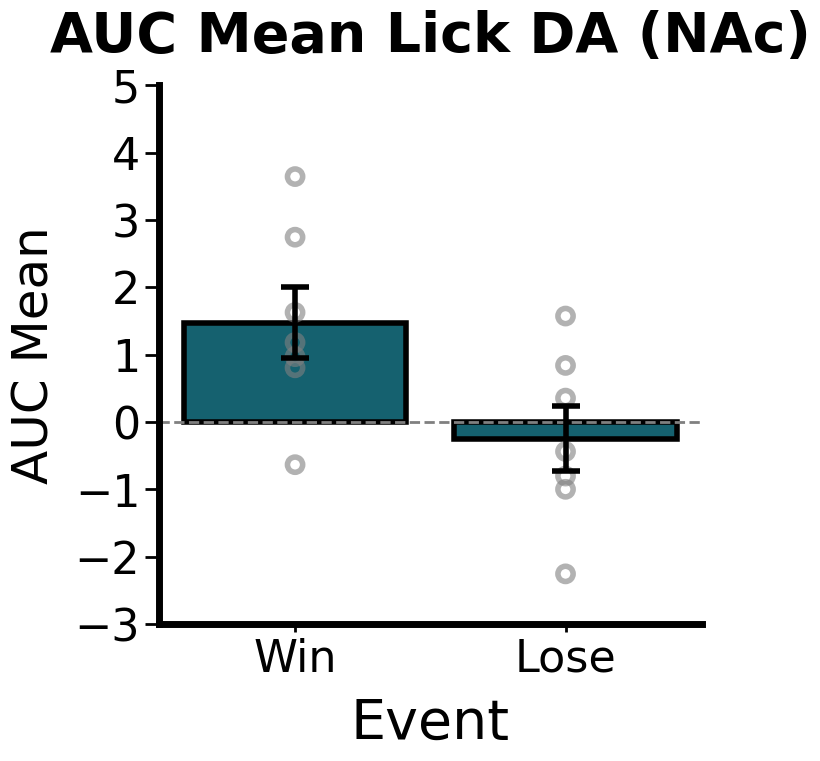

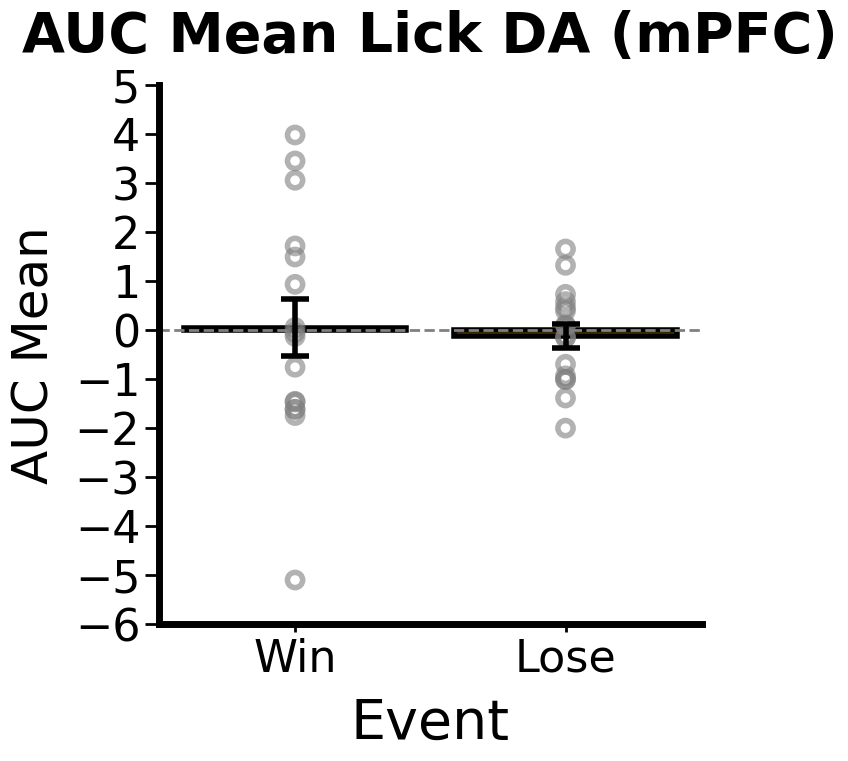

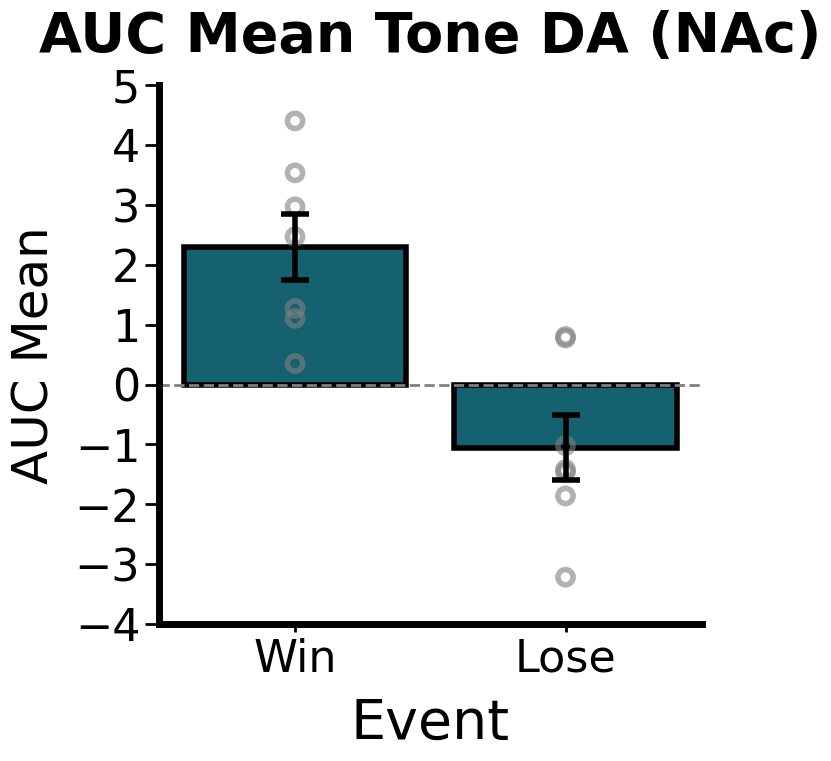

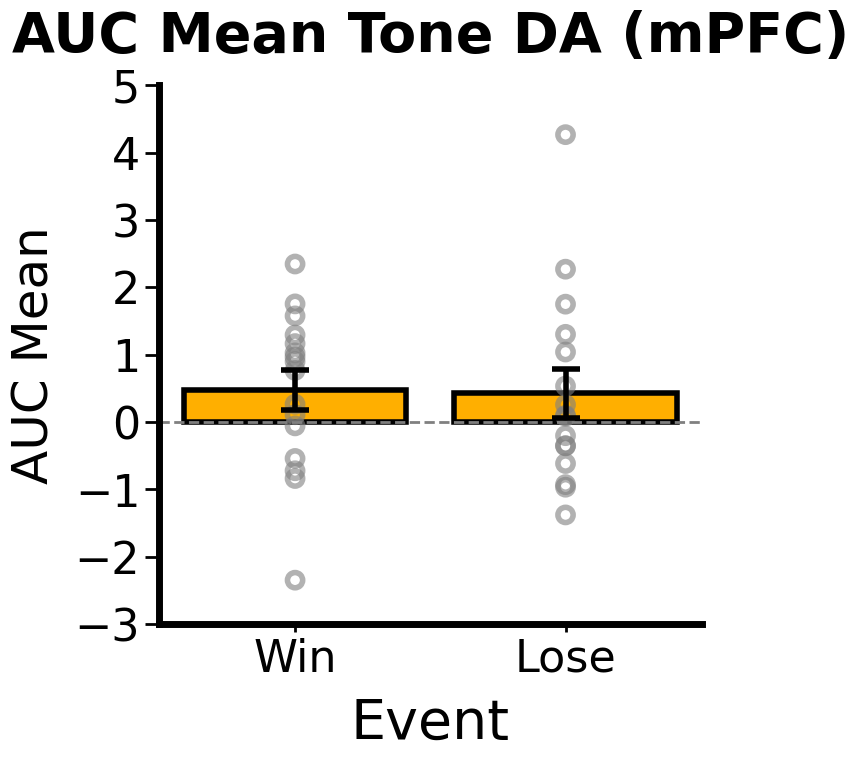

Index(['Lick Max Peak Mean', 'Tone Max Peak Mean'], dtype='object')
Index(['Lick Max Peak Mean', 'Tone Max Peak Mean'], dtype='object')
Lick Max Peak Mean    2.378288
dtype: float64


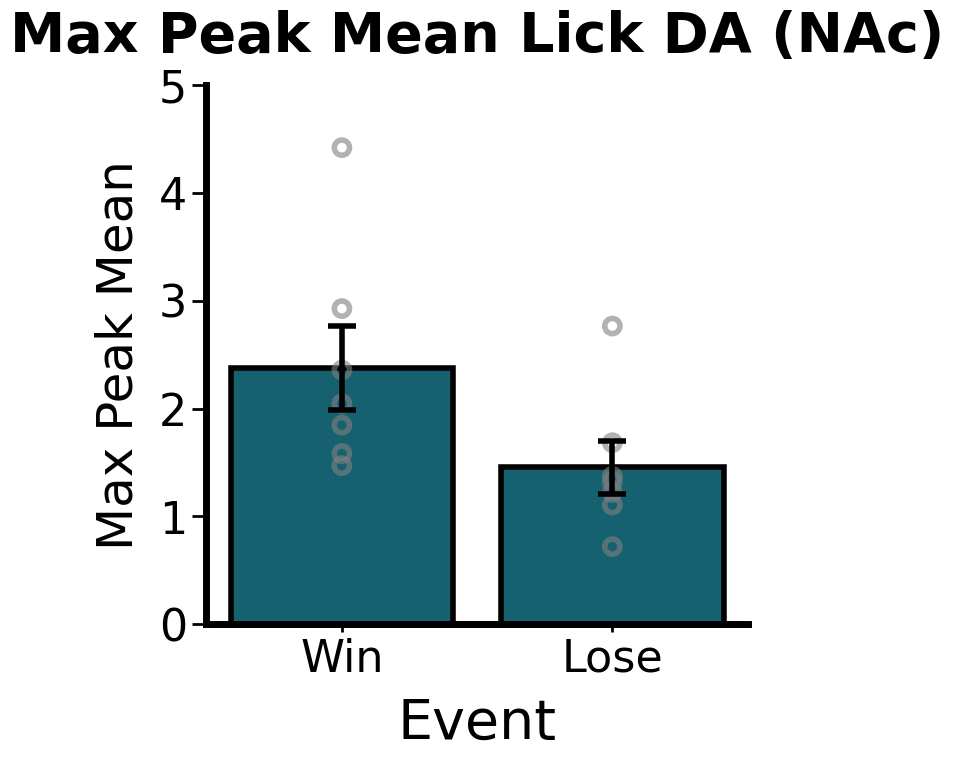

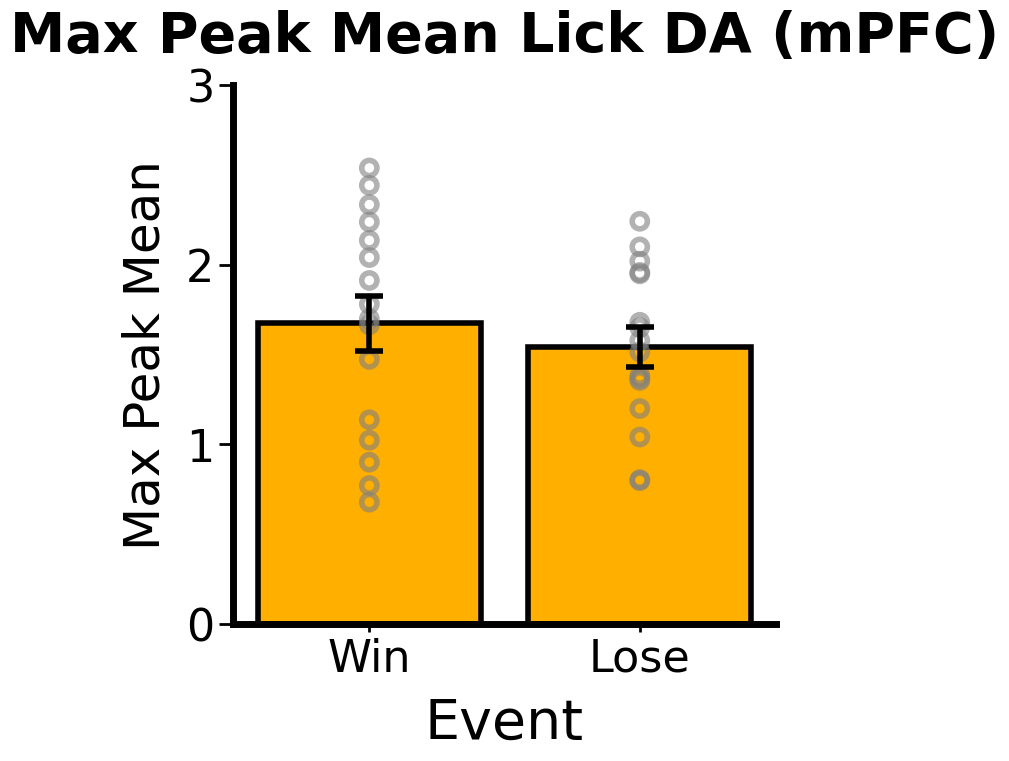

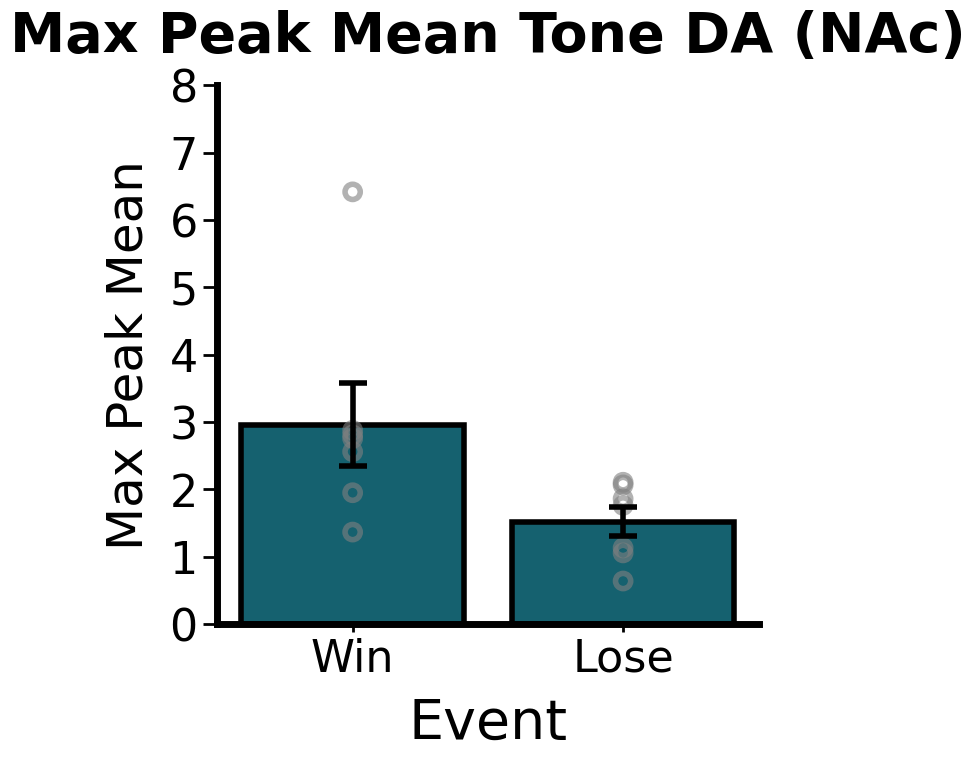

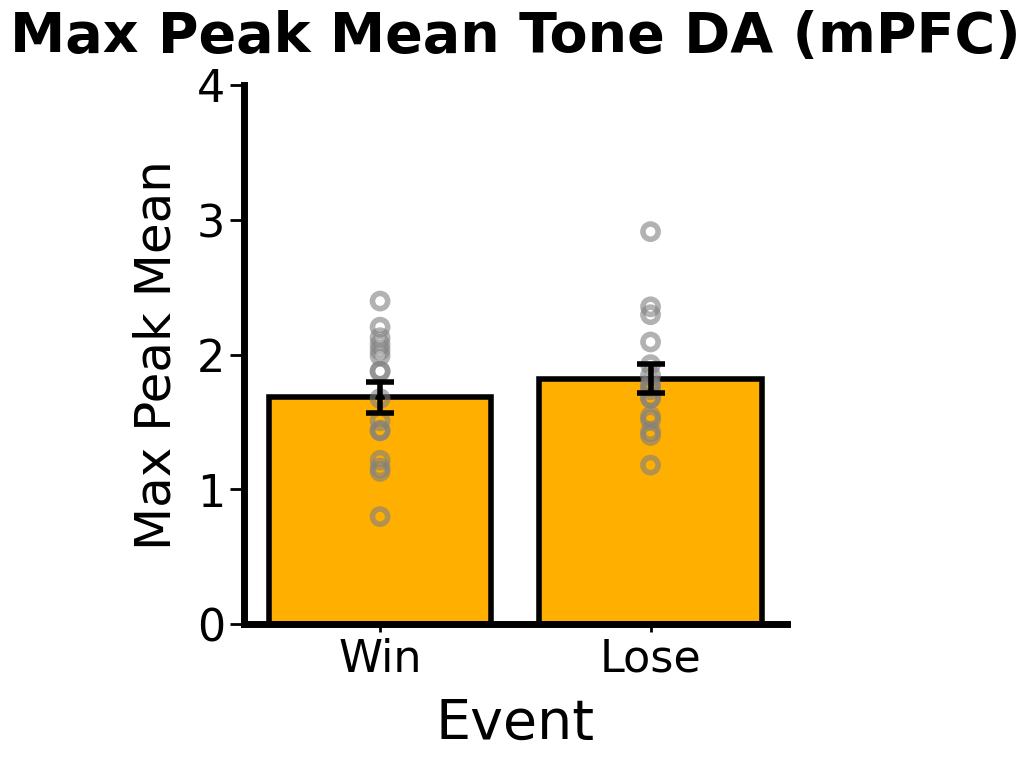

Index(['Lick Mean Z-score Mean', 'Tone Mean Z-score Mean'], dtype='object')
Index(['Lick Mean Z-score Mean', 'Tone Mean Z-score Mean'], dtype='object')
Lick Mean Z-score Mean    0.829123
dtype: float64


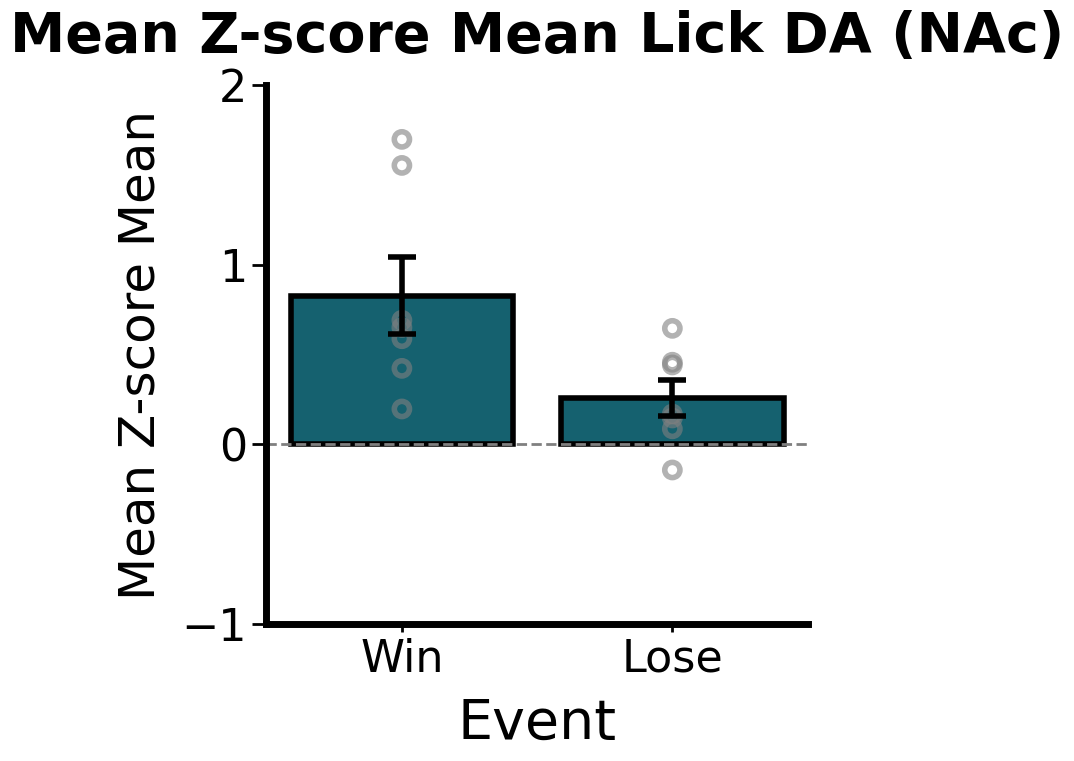

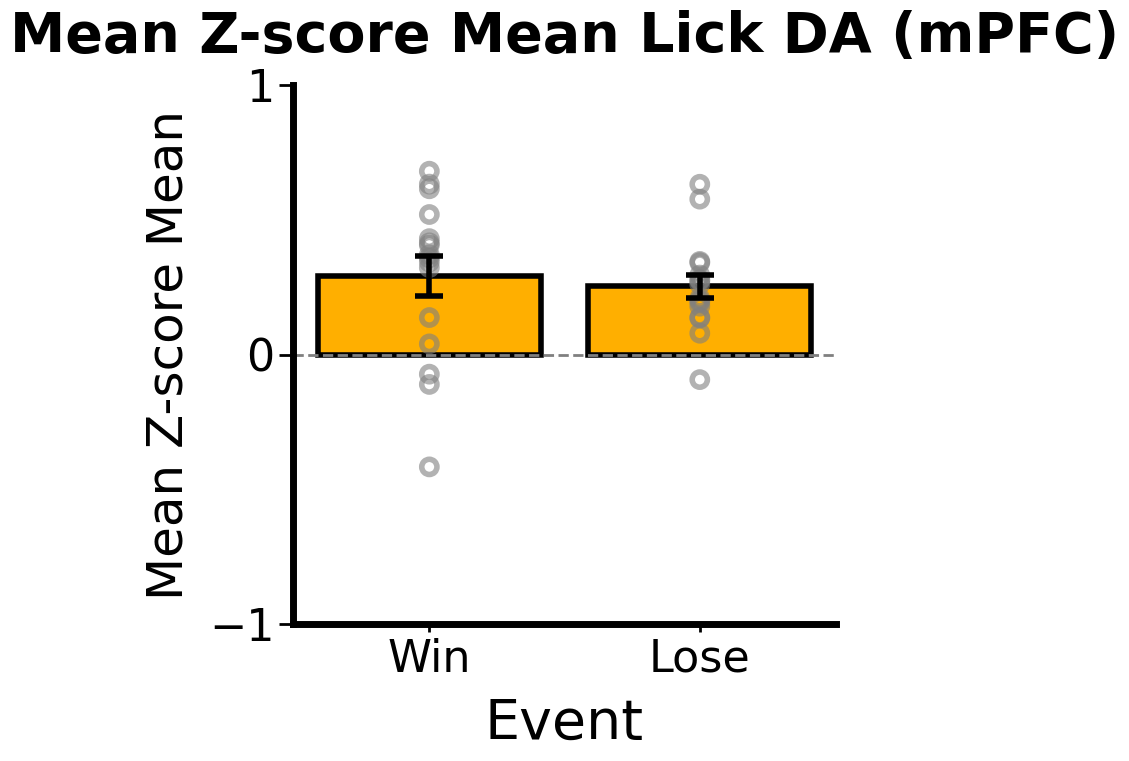

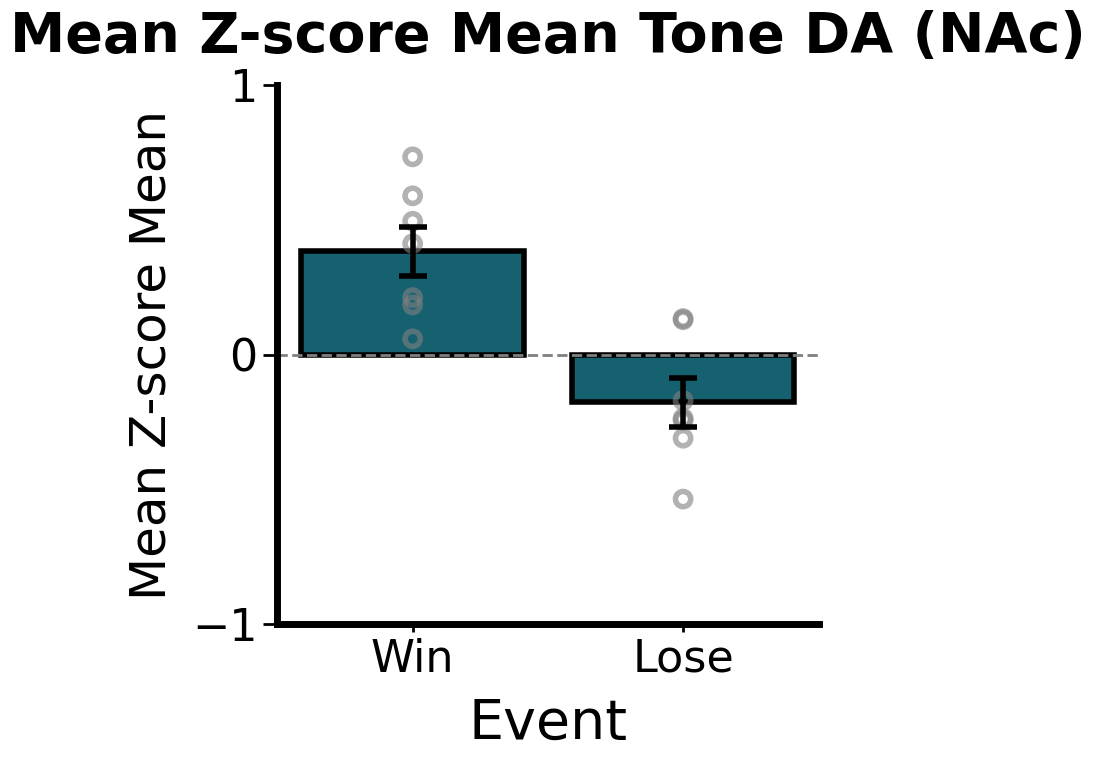

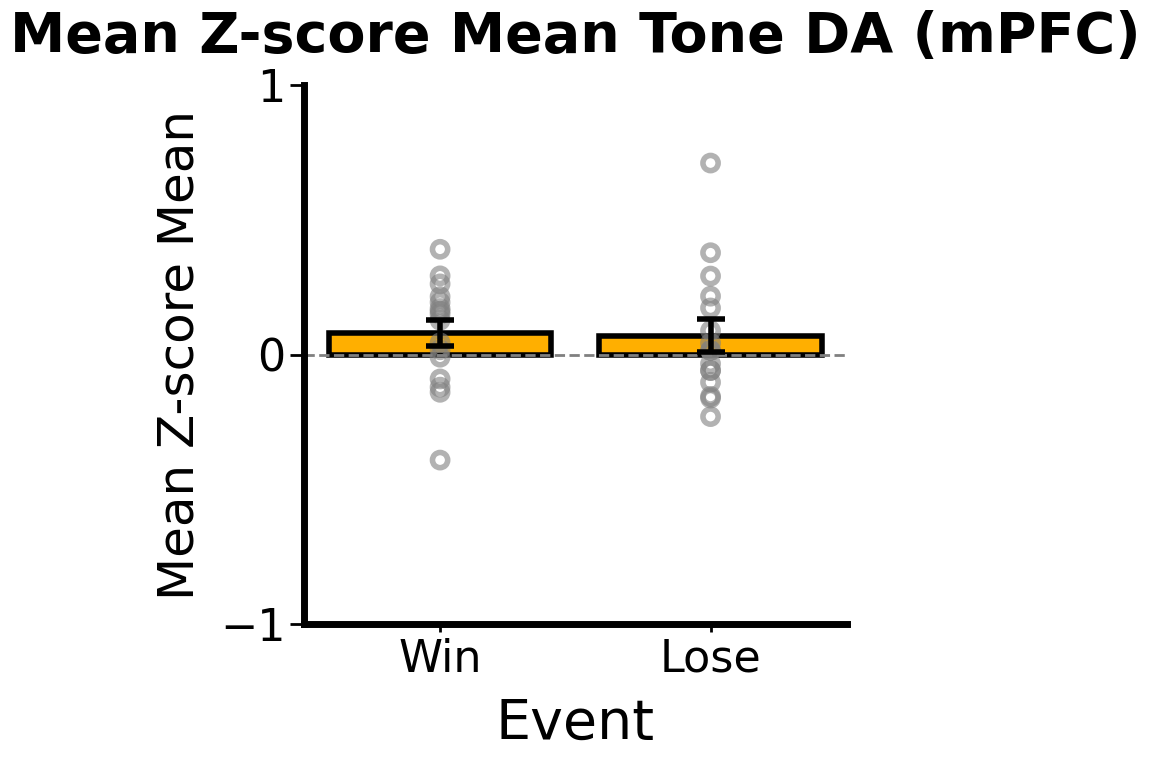

In [11]:
exp.plot_conditional(df_winning, df_losing, method='', metric_name='AUC Mean', directory_path=directory_path3)
exp.plot_conditional(df_winning, df_losing, method='', metric_name='Max Peak Mean', directory_path=directory_path3)
exp.plot_conditional(df_winning, df_losing, method='', metric_name='Mean Z-score Mean', directory_path=directory_path3)

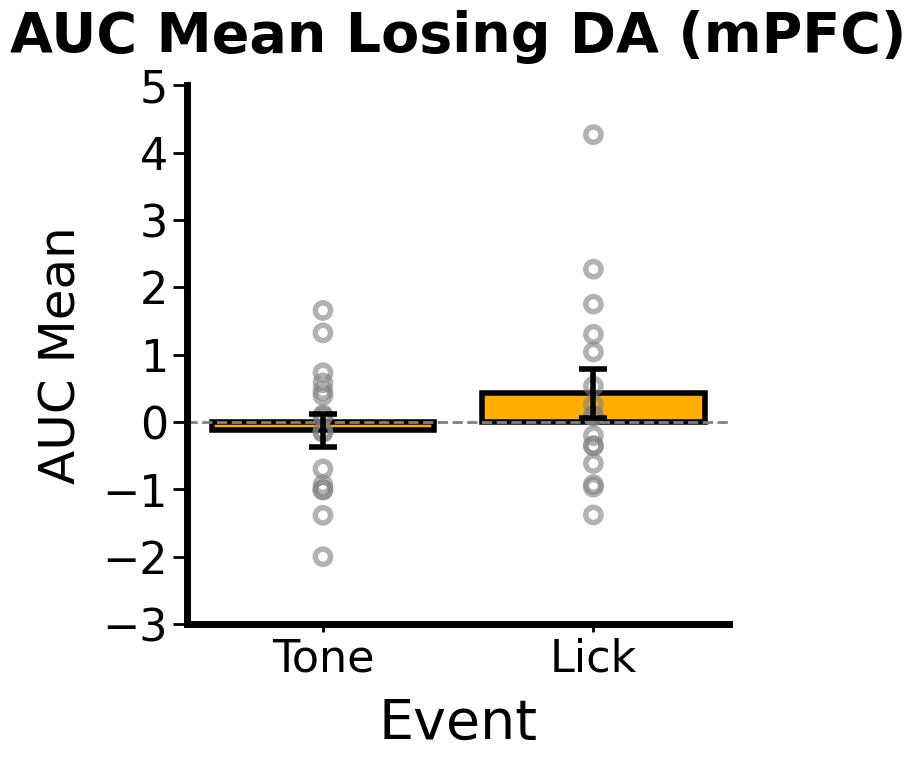

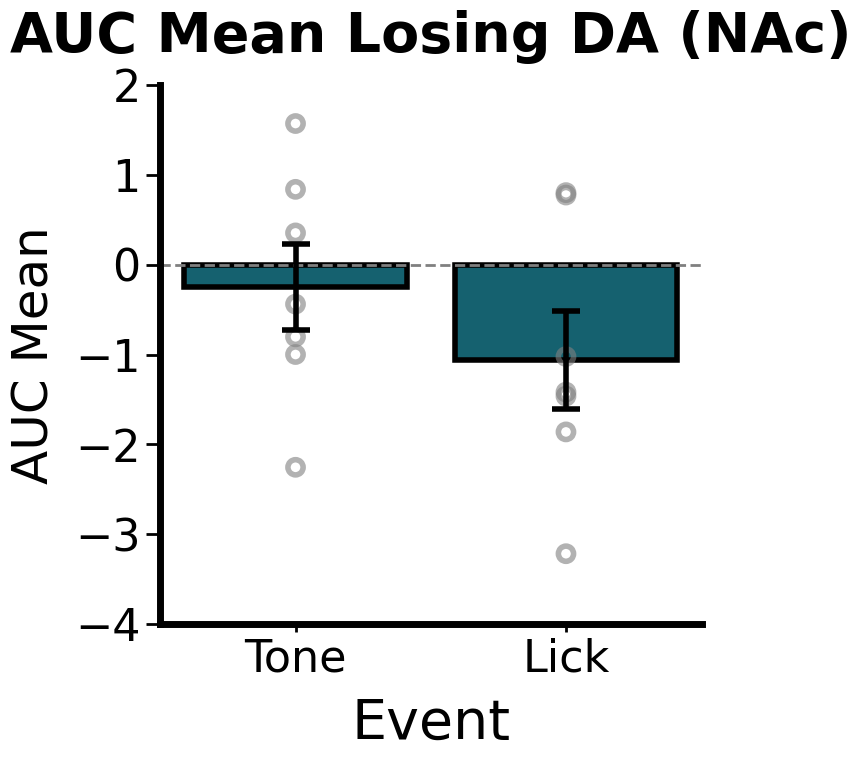

In [12]:
exp.plot_da_tone_lick(method='', metric_name='AUC Mean', directory_path=directory_path, condition=condition, brain_region="mPFC")
exp.plot_da_tone_lick(method='', metric_name='AUC Mean', directory_path=directory_path, condition=condition, brain_region="NAc")

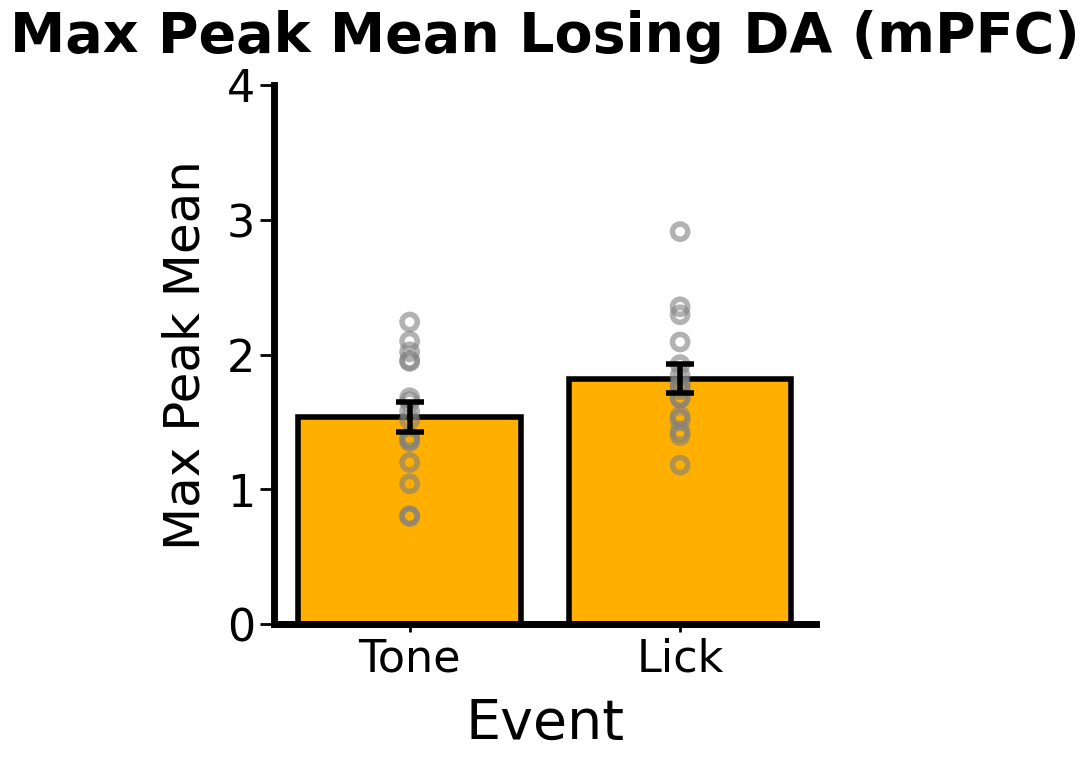

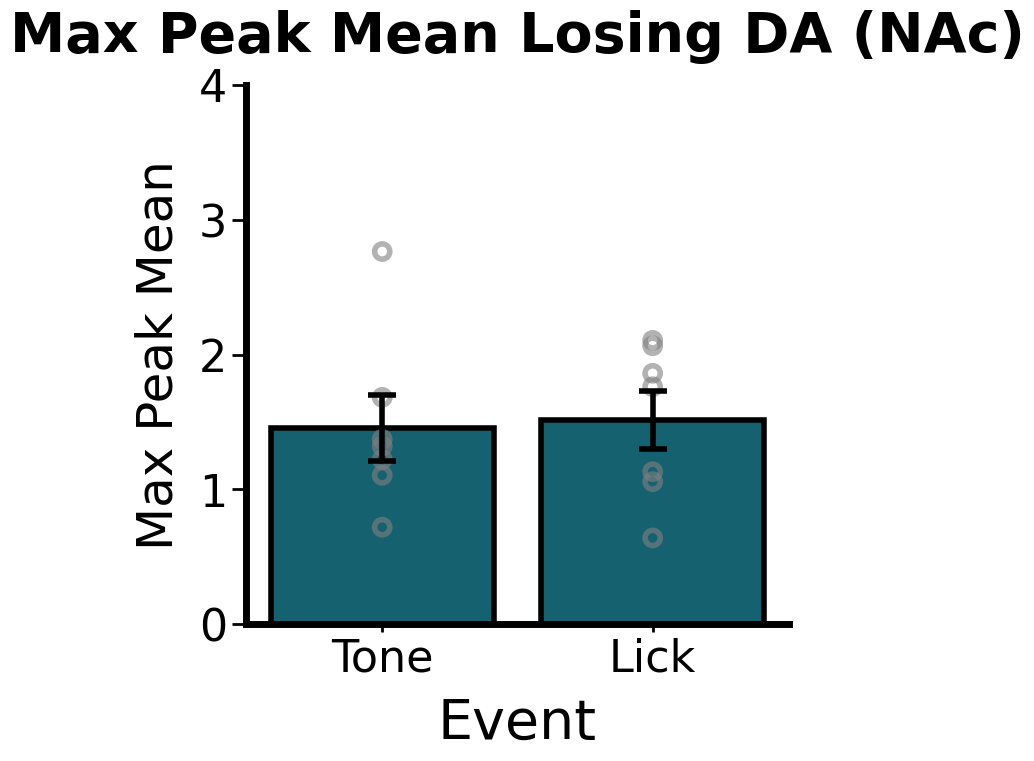

In [13]:
exp.plot_da_tone_lick(method='', metric_name='Max Peak Mean', directory_path=directory_path, condition=condition, brain_region="mPFC")
exp.plot_da_tone_lick(method='', metric_name='Max Peak Mean', directory_path=directory_path, condition=condition, brain_region="NAc")

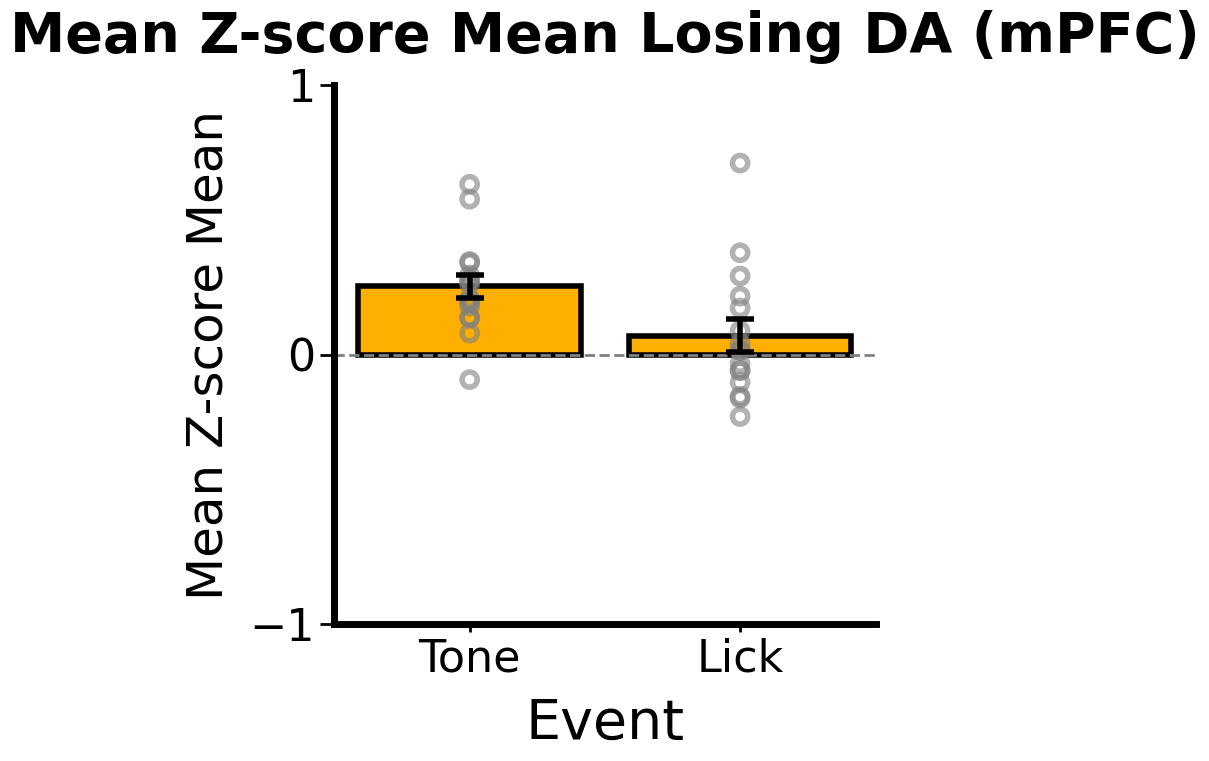

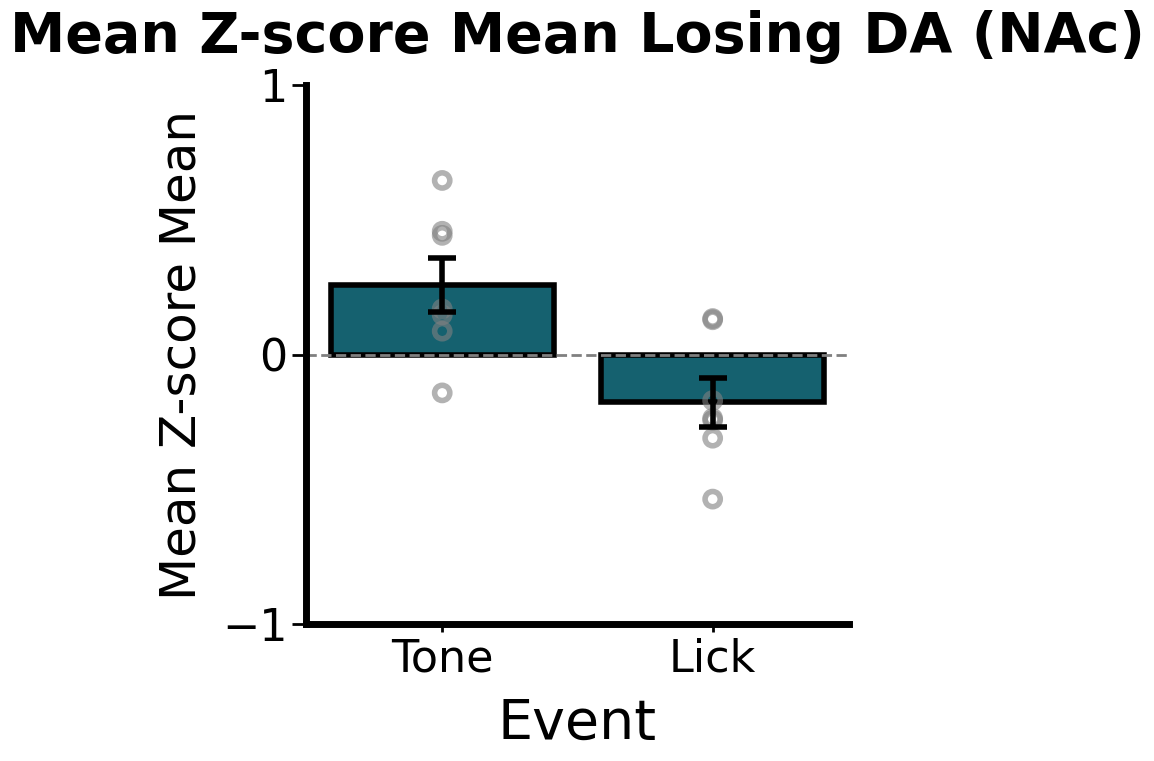

In [14]:
exp.plot_da_tone_lick(method='', metric_name='Mean Z-score Mean', directory_path=directory_path, condition=condition, brain_region="mPFC")
exp.plot_da_tone_lick(method='', metric_name='Mean Z-score Mean', directory_path=directory_path, condition=condition, brain_region="NAc")

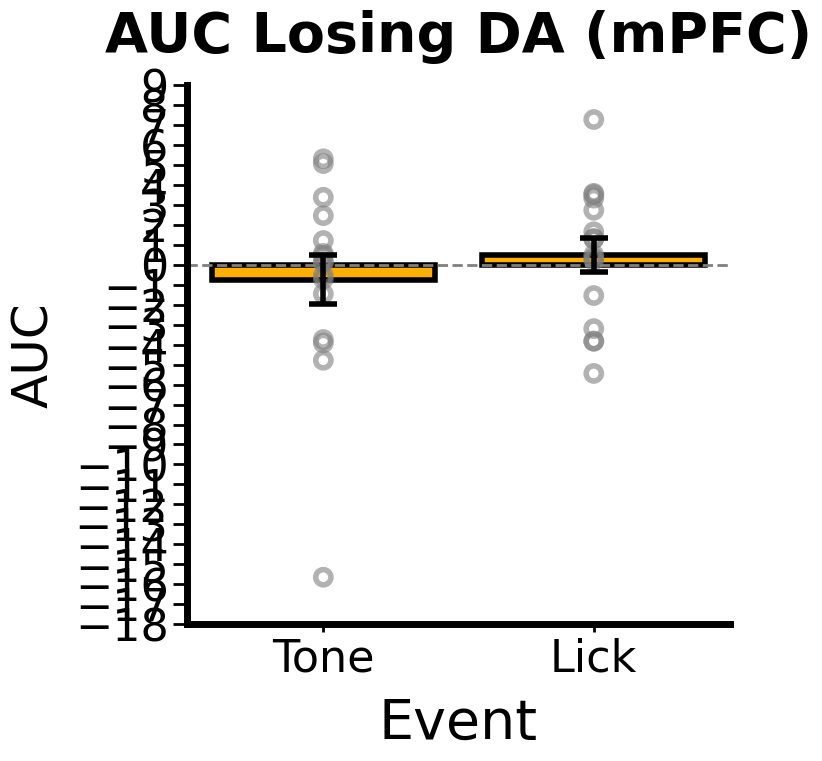

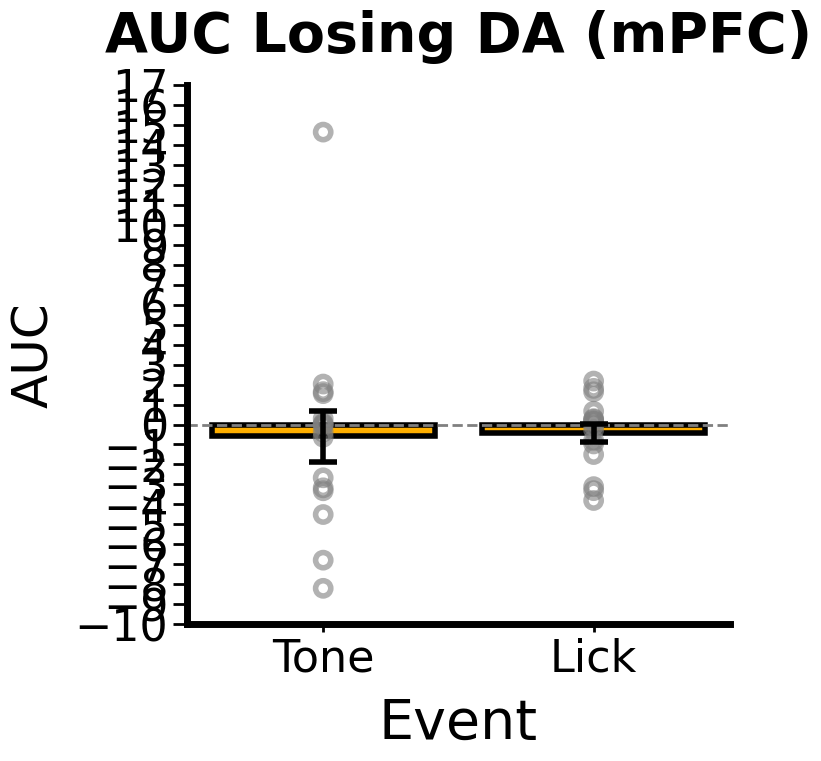

In [15]:
exp.plot_da_tone_lick(method=' First', metric_name='AUC', directory_path=directory_path1, condition=condition, brain_region="mPFC")
exp.plot_da_tone_lick(method=' Last', metric_name='AUC', directory_path=directory_path2, condition=condition, brain_region="mPFC")

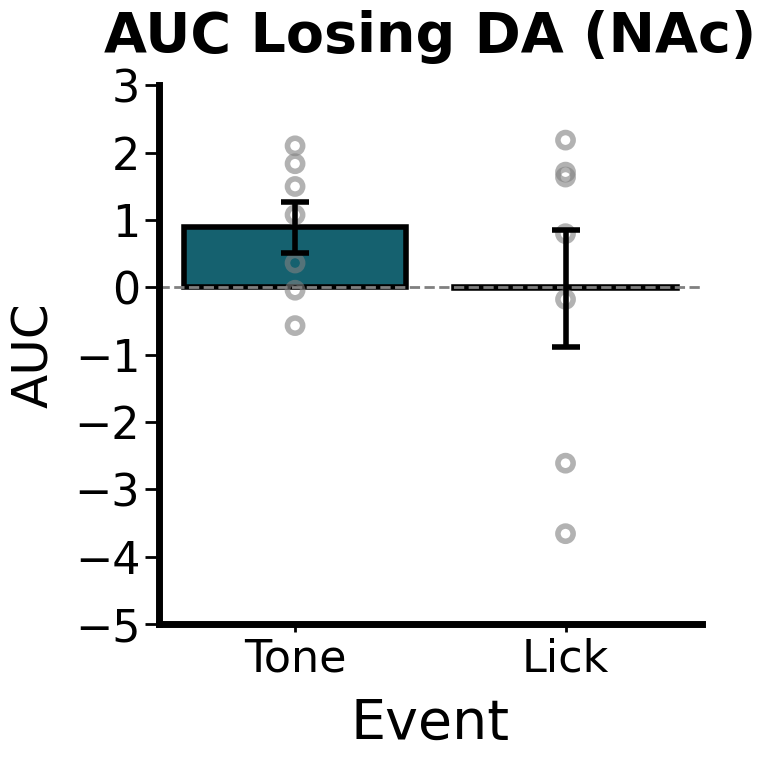

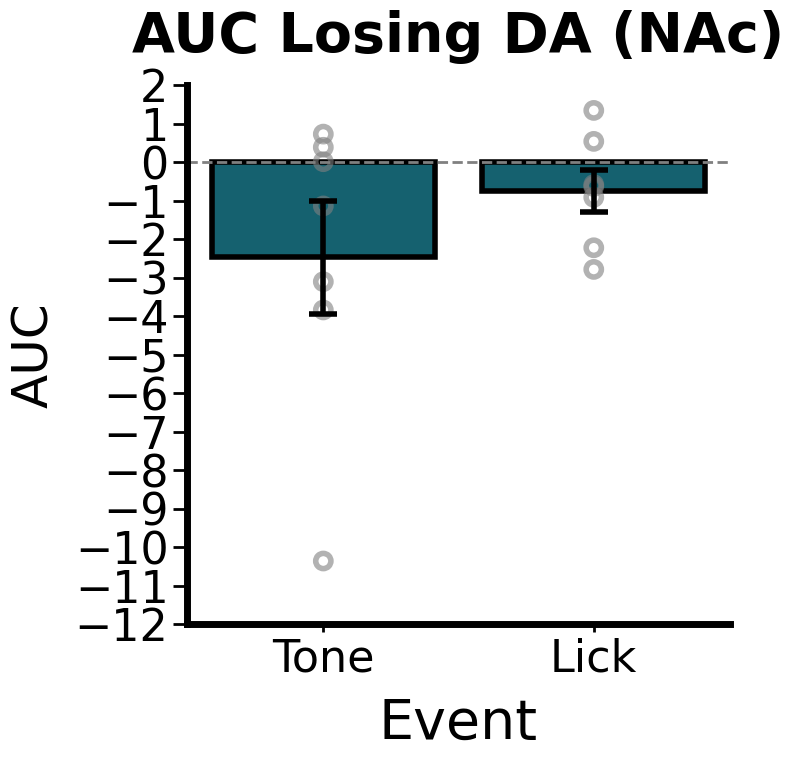

In [16]:
exp.plot_da_tone_lick(method=' First', metric_name='AUC', directory_path=directory_path1, condition=condition, brain_region="NAc")
exp.plot_da_tone_lick(method=' Last', metric_name='AUC', directory_path=directory_path2, condition=condition, brain_region="NAc")

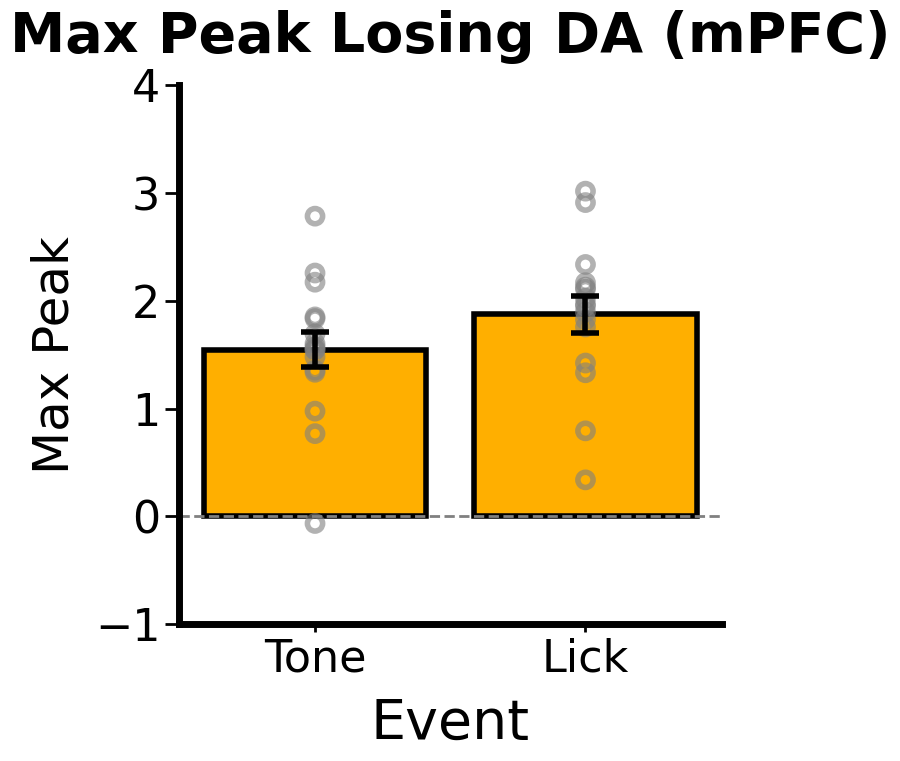

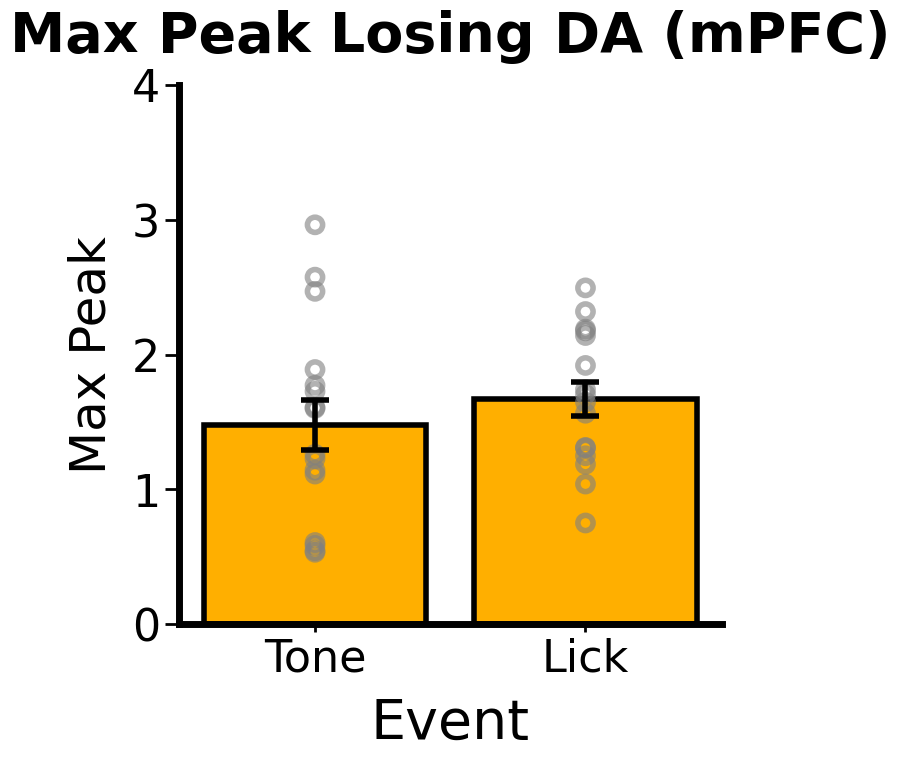

In [17]:
exp.plot_da_tone_lick(method=' First', metric_name='Max Peak', directory_path=directory_path1, condition=condition, brain_region="mPFC")
exp.plot_da_tone_lick(method=' Last', metric_name='Max Peak', directory_path=directory_path2, condition=condition, brain_region="mPFC")

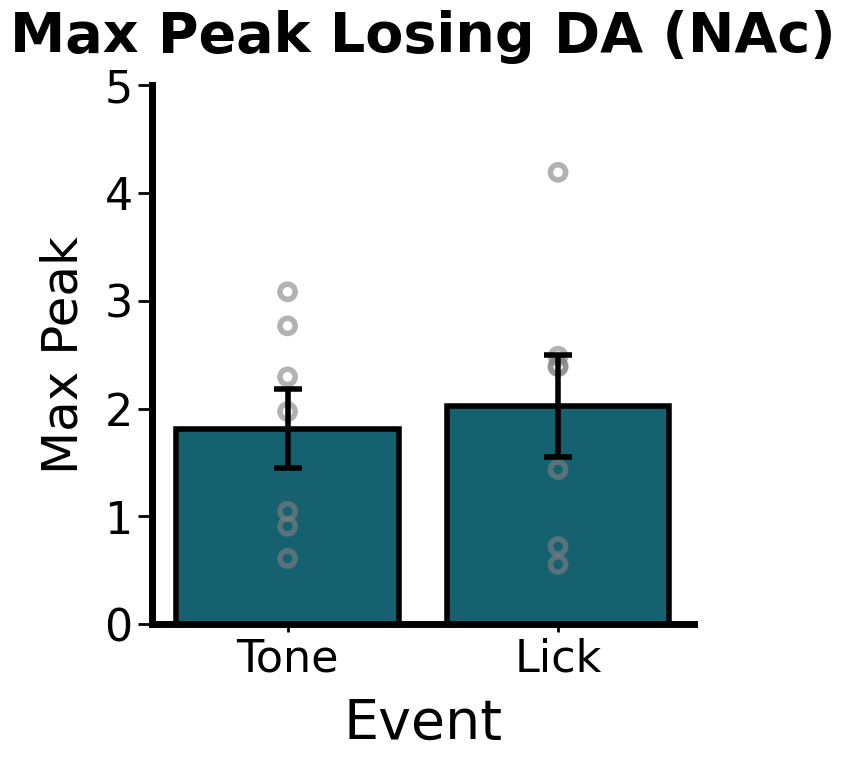

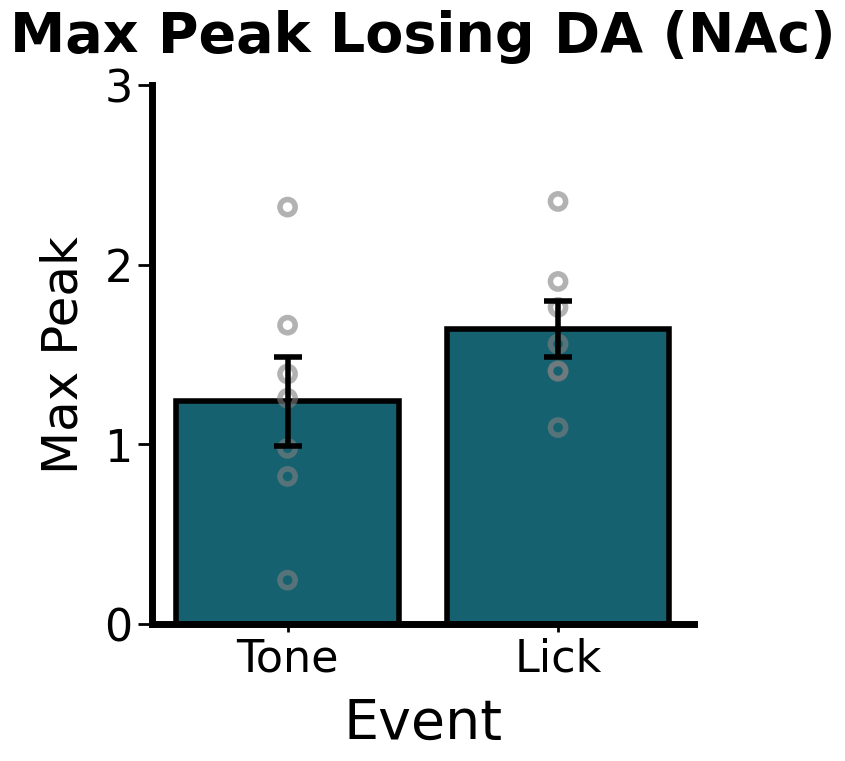

In [18]:
exp.plot_da_tone_lick(method=' First', metric_name='Max Peak', directory_path=directory_path1, condition=condition, brain_region="NAc")
exp.plot_da_tone_lick(method=' Last', metric_name='Max Peak', directory_path=directory_path2, condition=condition, brain_region="NAc")

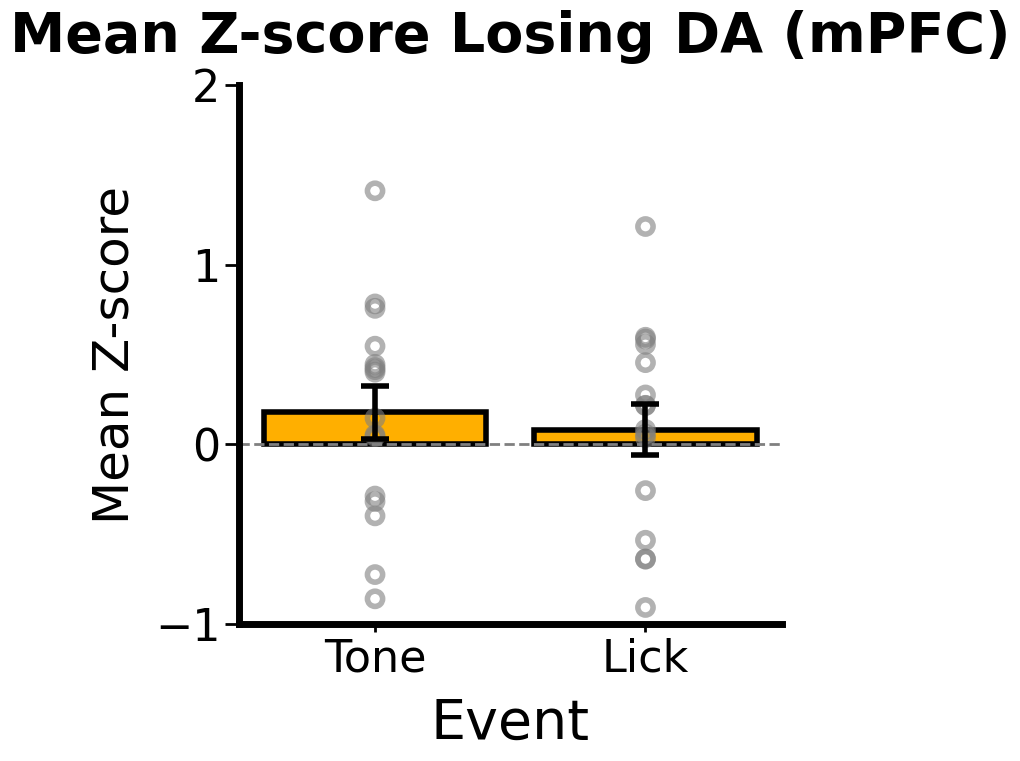

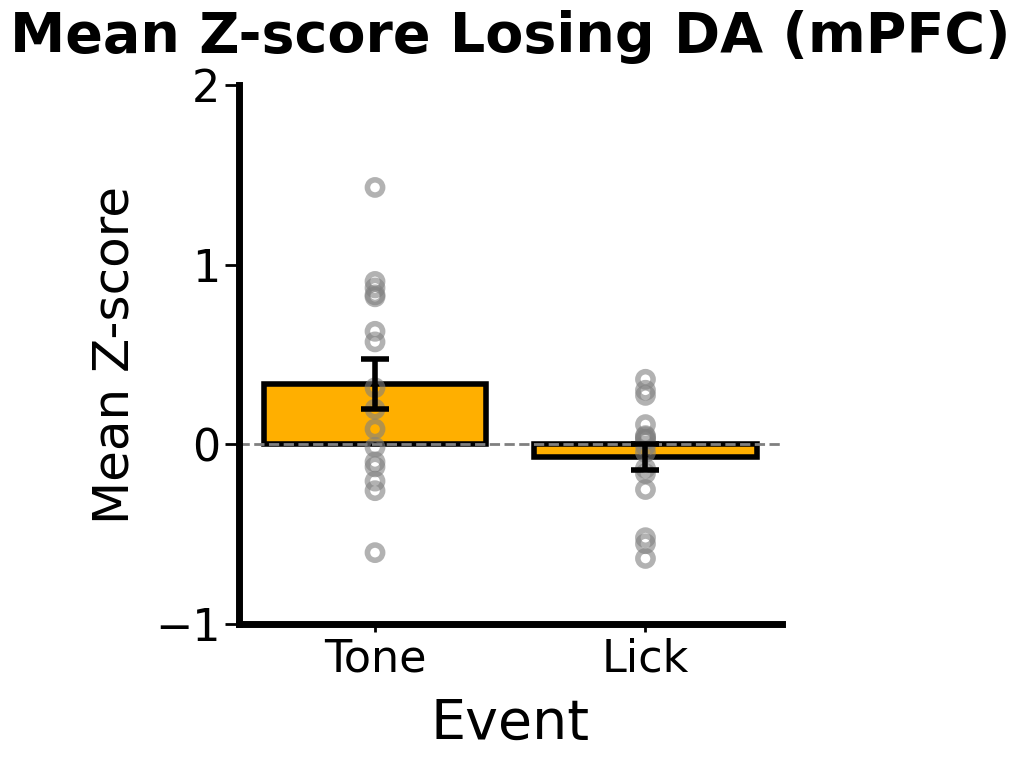

In [19]:
exp.plot_da_tone_lick(method=' First', metric_name='Mean Z-score', directory_path=directory_path1, condition=condition, brain_region="mPFC")
exp.plot_da_tone_lick(method=' Last', metric_name='Mean Z-score', directory_path=directory_path2, condition=condition, brain_region="mPFC")

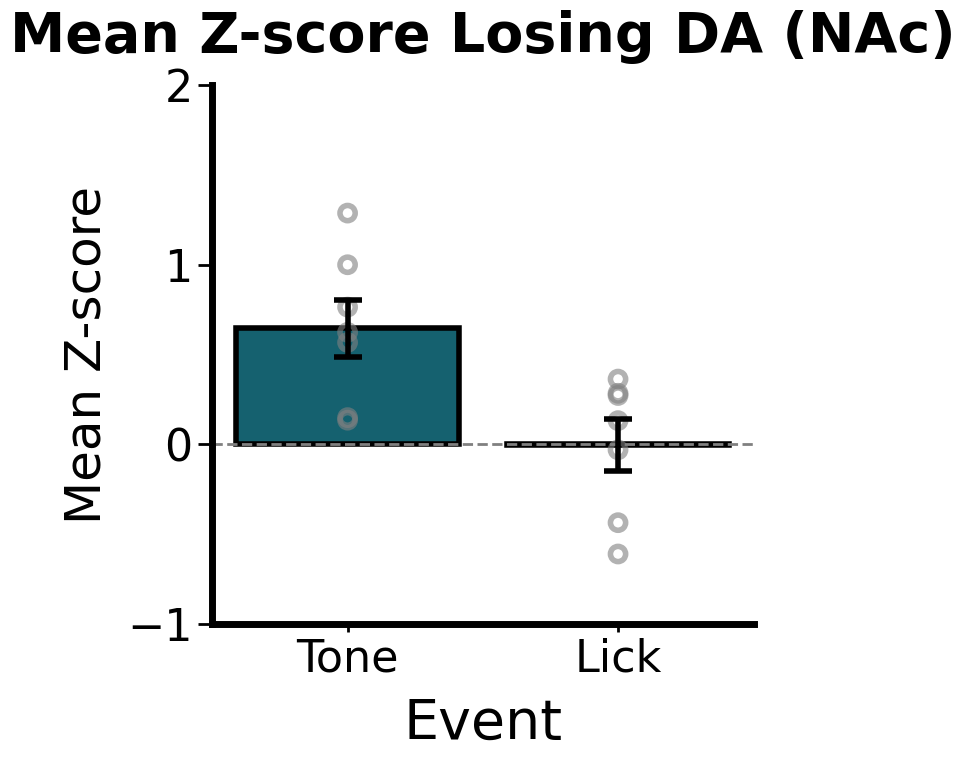

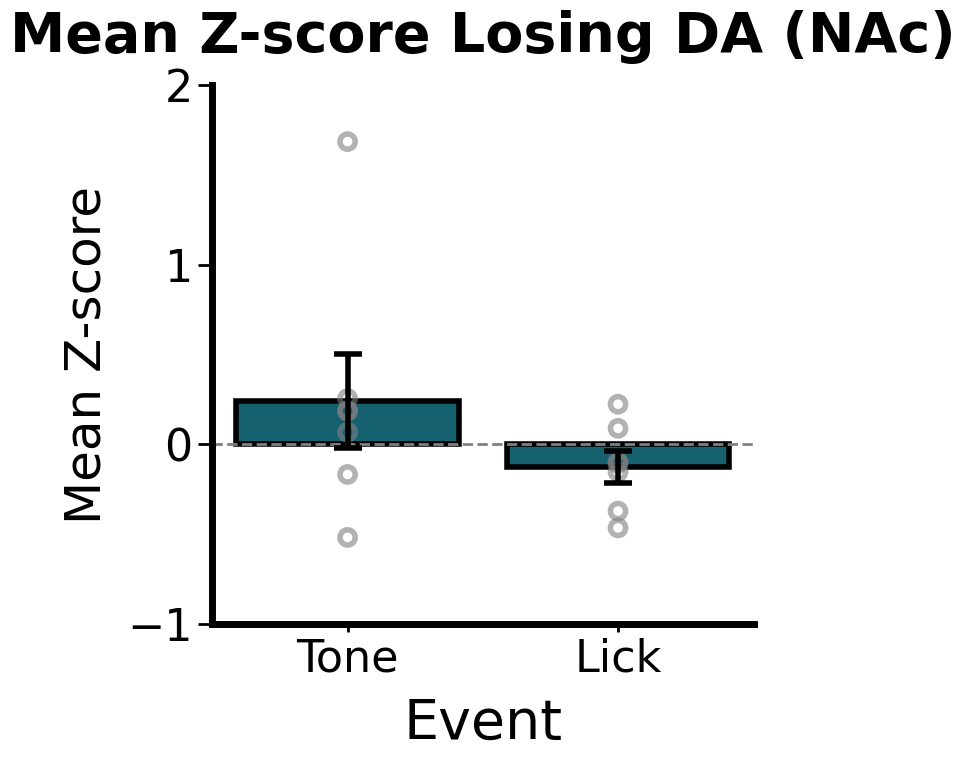

In [20]:
exp.plot_da_tone_lick(method=' First', metric_name='Mean Z-score', directory_path=directory_path1, condition=condition, brain_region="NAc")
exp.plot_da_tone_lick(method=' Last', metric_name='Mean Z-score', directory_path=directory_path2, condition=condition, brain_region="NAc")